In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [2]:
epochs = read_epochs('nirs_epo.fif')

FileNotFoundError: File does not exist: C:\Users\Alberto\Documents\BCI\data\dnn\nirs_epo.fif

In [ ]:
epochs['rest','left']

In [4]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [5]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,2,-61.511331,34.355297,444.397883,-334.526470,-25.939067,-1.508851,8.744184,...,-42.087187,-12.569325,-40.166298,-14.876654,40.828749,-135.048293,-28.894030,6.428219,-81.170372,101.128921
1,5.120,rest,2,-56.664256,32.564989,325.072062,-287.542323,-16.339991,-13.729918,-0.696221,...,-44.582554,-11.908770,-40.972558,-14.756039,-101.176454,-32.336011,-20.620673,-1.772764,-51.557789,-46.447487
2,5.248,rest,2,-52.040730,29.672783,207.379431,-223.343639,-22.409113,-11.959369,-9.898020,...,-42.956181,-10.286462,-38.782666,-13.571342,-173.330365,0.332953,-16.798198,-5.110537,-50.172719,-143.400015
3,5.376,rest,2,-49.143411,27.727794,105.404935,-146.560706,-42.159918,2.866873,-8.822599,...,-37.713966,-8.294735,-34.172292,-11.687193,-154.001857,-41.318475,-18.080616,-2.594904,-35.881691,-208.251018
4,5.504,rest,2,-48.730373,28.195702,23.977569,-61.695398,-70.475900,26.724105,5.787494,...,-30.250372,-6.580987,-28.233733,-9.601540,-54.381257,-136.018745,-22.884955,4.245946,24.220661,-263.070775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,11.520,left,116,16.013921,1.416699,-130.555214,-17.643611,86.424996,-59.050384,-48.936465,...,29.492763,6.023029,42.039366,12.855593,74.572657,-306.841335,9.513347,2.967967,628.756592,-600.310974
2068,11.648,left,116,18.369519,-0.527354,-5.889262,-147.492203,112.824768,-88.405635,-72.256815,...,31.123418,4.100282,42.858435,12.272934,-176.380301,-41.446427,8.331177,4.278573,810.648198,-794.724561
2069,11.776,left,116,19.869585,-0.842221,85.001288,-229.975776,137.523210,-115.894640,-101.452599,...,32.345390,2.650672,42.459338,11.481751,-472.003099,313.411234,4.996708,10.869456,859.244086,-860.107772
2070,11.904,left,116,20.633124,0.128609,124.729282,-248.529715,154.958674,-134.666785,-123.807564,...,32.721477,1.664823,40.649764,10.471617,-709.797372,643.146574,0.277987,21.367305,766.113633,-786.429038


In [6]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [7]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_12448\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_12448\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_12448\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_12448\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [8]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
2,rest,21.283306,267.927460,51.849957,108.473741,239.788105,31.139805,434.331001,17.085710,18.771994,535.794969,8.459005,9.074506,573.914478,18.719359,401.122724,13.170656,10.391806,355.501847,20.568151,381.573349
3,left,9.883641,418.953785,51.949162,71.926259,360.256266,14.465773,403.089582,5.733809,26.521548,522.316203,3.855433,4.535655,374.734501,28.541620,207.884681,4.370066,3.771571,316.342725,17.551353,268.816655
4,rest,7.174090,255.092221,31.371261,96.385629,392.806005,11.580689,349.380059,7.726879,24.716599,642.699387,3.733530,2.996360,330.948500,22.566725,351.139545,6.792680,5.838394,360.418684,15.838804,210.601943
9,left,11.100197,218.311529,33.571491,78.786143,228.530446,19.564418,518.934554,9.951818,20.261001,494.327301,4.190619,6.014893,409.602685,21.145083,205.158825,8.613667,6.647354,486.635402,29.354009,350.322726
10,rest,10.118061,335.582592,25.814687,80.326728,285.612885,11.099671,327.631424,6.043156,22.313538,573.389044,2.638817,3.078426,407.868797,20.047542,236.160126,5.143630,4.440765,366.272625,15.400677,349.410837
11,left,8.606074,288.847541,46.446684,130.029949,415.598940,8.660072,321.121214,10.102134,18.476560,381.552471,3.597344,6.431450,274.563446,17.566307,241.750662,10.156116,7.723819,411.374272,22.379628,286.286523
13,left,8.450010,407.434159,47.595754,56.581658,417.667566,19.097914,446.887573,3.565235,19.734450,536.304835,2.843769,2.588859,493.160596,17.575195,313.996720,2.596495,3.989673,346.590166,24.006698,389.808606
24,left,10.764002,264.800637,31.873145,73.549660,412.329493,17.710897,485.933256,5.356545,23.232166,491.611499,2.689855,3.509844,542.549743,29.067729,215.923553,4.841362,1.809281,527.170166,30.252178,297.082316
25,left,6.638761,421.540770,51.945512,93.007973,318.451877,17.480749,477.720190,9.400472,21.375735,570.483362,3.416053,4.586853,435.512394,22.510247,216.791723,8.663226,7.546707,368.753082,18.485351,332.457135


In [9]:
grouped = mean.groupby(['epoch','condition']).count()

In [10]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [11]:
grouped.index.values

array([(2, 'rest'), (3, 'left'), (4, 'rest'), (9, 'left'), (10, 'rest'),
       (11, 'left'), (13, 'left'), (24, 'left'), (25, 'left'),
       (31, 'left'), (32, 'left'), (37, 'left'), (38, 'rest'),
       (41, 'left'), (44, 'rest'), (52, 'left'), (53, 'rest'),
       (54, 'left'), (60, 'rest'), (69, 'left'), (71, 'left'),
       (72, 'rest'), (73, 'left'), (76, 'left'), (79, 'left'),
       (80, 'rest'), (82, 'left'), (84, 'left'), (85, 'left'),
       (91, 'left'), (98, 'left'), (100, 'rest'), (103, 'left'),
       (104, 'left'), (113, 'rest'), (115, 'rest'), (116, 'left')],
      dtype=object)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [14]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [19]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

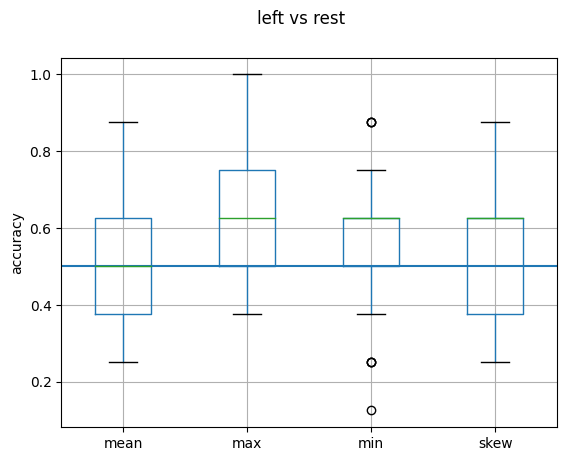

In [20]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [22]:
scores_df.median().to_numpy()

array([0.5  , 0.625, 0.625, 0.625])